In [1]:
# enabling 3rd party widgets
# from google.colab import output
# output.enable_custom_widget_manager()
# output.disable_custom_widget_manager()

# interactive 3D plot
# !pip install ipympl
# %matplotlib widget

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

import time as time
import platform as platform

import h5py

In [3]:
colab_flag = False

In [4]:
current_sys = platform.system()

if current_sys == 'Windows':
    dir_sep = '\\'
else:
    dir_sep = '/'

In [5]:
if colab_flag == True:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/Github/MLROM/KS/')

In [6]:
print(os.getcwd())

/home/rkaushik/Documents/Thesis/MLROM/KS


# KS System

In [7]:
def plot(
        boundary_idx_arr,
        delta_t,
        all_data,
        xgrid,
        xticks_snapto=20,
        num_yticks=11,
    ):

    n = len(boundary_idx_arr)
    # '''
    num_cols = 1
    num_rows = 1
    factor = 1
    # fig = plt.figure(figsize=(7.5*num_cols, 7.5*num_rows))

    num_modes = xgrid.shape[0]

    prev_idx = 0
    for i in range(len(boundary_idx_arr)):
        next_idx = boundary_idx_arr[i]
        fig, ax = plt.subplots(figsize=(factor*7.5*num_cols, factor*5.0*num_rows))
        N = next_idx - prev_idx
        input_time = np.arange(0, N)*delta_t

        im = ax.imshow(all_data[prev_idx:next_idx, 0:num_modes].transpose(), aspect='auto', origin='lower')
        num_xticks = 1 + int((N*delta_t + 0.5*xticks_snapto) // xticks_snapto)
        # xticks = np.linspace(0, N, num_xticks, dtype=np.int32)
        xticks = np.arange(0, N, int((xticks_snapto+0.5*delta_t)//delta_t))
        ax.set_xticks(ticks=xticks)
        ax.set_xticklabels(np.round(xticks*delta_t, 1))
        ax.tick_params(axis='x', rotation=270+45)

        yticks = np.linspace(0, 1, num_yticks)*(len(xgrid)-1)
        yticklabels = np.round(np.linspace(0, 1, yticks.shape[0])*xgrid[-1], 2)
        ax.set_yticks(ticks=yticks)
        ax.set_yticklabels(yticklabels)

        ax.set_xlabel('Time')
        ax.set_ylabel(r'$x$')
        # ax.title.set_text(r'Latent States')

        plt.colorbar(im)
        plt.show()
        print('')

        prev_idx = next_idx

    # '''

In [8]:
from numpy import *

data_dir_idx = '004'

dir_name_data = os.getcwd() + dir_sep + 'saved_data' + dir_sep + 'data_' + data_dir_idx
    
with open(dir_name_data + dir_sep + 'sim_data_params.txt') as f:
    lines = f.readlines()
params_dict = eval(''.join(lines))
params_mat = params_dict['params_mat']
# init_state = params_dict['init_state']
t0 = params_dict['t0']
T = params_dict['T']
delta_t = params_dict['delta_t']
numpoints_xgrid = params_dict['numpoints_xgrid']
length = params_dict['length']
return_params_arr = params_dict['return_params_arr']
normalize_flag_ogdata = params_dict['normalize_flag']
print('normalize_flag_ogdata:', normalize_flag_ogdata)
alldata_withparams_flag = params_dict['alldata_withparams_flag']

xgrid = length*np.linspace(0, 1, numpoints_xgrid)

fl = np.load(dir_name_data+dir_sep+'data.npz', allow_pickle=True)
all_data_og = fl['all_data']
boundary_idx_arr = fl['boundary_idx_arr']
normalization_constant_arr_ogdata = fl['normalization_constant_arr'][0]
initial_t0 = fl['initial_t0']

normalize_flag_ogdata: False


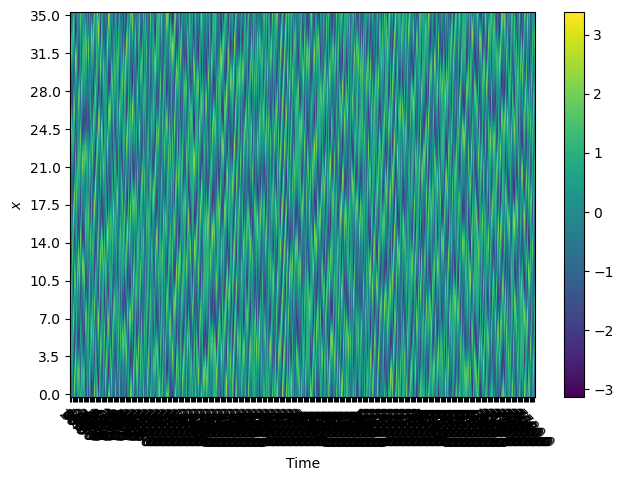

In [9]:
plot(
    boundary_idx_arr,
    delta_t,
    all_data_og,
    xgrid)

In [10]:
dir_name_all_ae = os.getcwd()+'{ds}saved_ae'.format(ds=dir_sep)
dir_contents_list = os.listdir(dir_name_all_ae)
chosen_dir_list = []
for elem in dir_contents_list:
    dir_name_ae = dir_name_all_ae + dir_sep + elem
    if os.path.isdir(dir_name_ae):
        with open(dir_name_ae + dir_sep + 'ae_data.txt') as f:
            lines = f.readlines()
            params_dict = eval(''.join(lines))
            if data_dir_idx == params_dict['data_dir_idx']:
                chosen_dir_list.append(elem)

print('chosen_dir_list:', chosen_dir_list)

chosen_dir_list: ['ae_020', 'ae_017', 'ae_021', 'ae_019', 'ae_018', 'ae_016']


In [11]:
num_latent_states_list = []
KE_nrmse_list = []
D_nrmse_list = []

for elem in chosen_dir_list:
    print('\n\n-------------------- {} --------------------'.format(elem))
    dir_name_ae = dir_name_all_ae + dir_sep + elem
    # reading simulation parameters
    fl = np.load(dir_name_ae+dir_sep+'KE_D_data.npz', allow_pickle=True)
    KE_nrmse = fl['KE_nrmse']
    D_nrmse = fl['D_nrmse']
    num_latent_states = fl['num_latent_states'][0]
    
    KE_nrmse_list.append(KE_nrmse)
    D_nrmse_list.append(D_nrmse)
    num_latent_states_list.append(num_latent_states)    



-------------------- ae_020 --------------------


-------------------- ae_017 --------------------


-------------------- ae_021 --------------------


-------------------- ae_019 --------------------


-------------------- ae_018 --------------------


-------------------- ae_016 --------------------


In [12]:
sorted_idx = np.argsort(num_latent_states_list)
num_latent_states_list = np.array(num_latent_states_list)[sorted_idx]
KE_nrmse_list = np.array(KE_nrmse_list)[sorted_idx]
D_nrmse_list = np.array(D_nrmse_list)[sorted_idx]
chosen_dir_list = np.array(chosen_dir_list)[sorted_idx]

In [13]:
D_nrmse_list

array([[0.24330505],
       [0.31556119],
       [0.21849733],
       [0.21590947],
       [0.21396133],
       [0.21487216]])

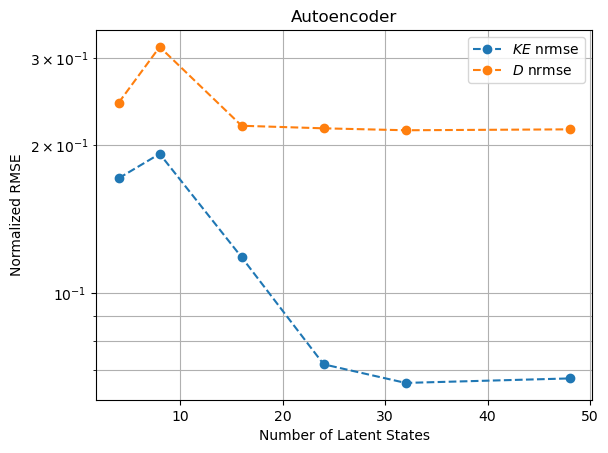

In [14]:
plt.semilogy(num_latent_states_list, KE_nrmse_list, '--', marker='o', label=r'$KE$ nrmse')
plt.semilogy(num_latent_states_list, D_nrmse_list, '--', marker='o', label=r'$D$ nrmse')
plt.grid(True, which='both')
plt.legend()
plt.xlabel('Number of Latent States')
plt.ylabel('Normalized RMSE')
plt.title('Autoencoder')
plt.show()

# POD

In [15]:
cov_matrix = all_data_og[:, 0:xgrid.shape[0]].transpose() @ all_data_og[:, 0:xgrid.shape[0]]
cov_matrix /= xgrid.shape[0]-1

In [16]:
eigenvals, eigenvecs = linalg.eig(cov_matrix)

In [17]:
sorted_idx = np.argsort(eigenvals)
eigenvals = eigenvals[sorted_idx]
eigenvecs = eigenvecs[:, sorted_idx]

In [18]:
def compute_laplace_operator(
        data,
        xgrid
    ):
    from scipy.fft import fft, ifft, fftfreq
    M = xgrid.shape[0]
    length = xgrid[-1]
    k = fftfreq(M) * M * 2*np.pi/length
    laplace_operated_data = data[:, 0:M].copy()
    for i in range(data.shape[0]):
        v = fft(data[i, 0:M])
        v = k*k*v
        laplace_operated_data[i, :] = np.real(ifft(v))
    return laplace_operated_data

In [19]:
pod_KE_nrmse_list = []
pod_D_nrmse_list = []

for i in range(len(num_latent_states_list)):
    num_latent_states = num_latent_states_list[i]
    dir_name_ae = dir_name_all_ae + dir_sep + chosen_dir_list[i]
    fl = np.load(dir_name_ae+dir_sep+'KE_D_data.npz', allow_pickle=True)
    KE_org_list = fl['KE_org_list']
    D_org_list = fl['D_org_list']

    Wl = eigenvecs[:, -num_latent_states:]
    Xl = all_data_og[:, 0:xgrid.shape[0]] @ Wl @ Wl.transpose()
    
    prev_idx = 0
    for j in range(len(boundary_idx_arr)):
        next_idx = boundary_idx_arr[j]
        KE_pod = np.sum(Xl[prev_idx:next_idx, 1:-1]**2, axis=1)
        KE_pod += 0.5*(Xl[prev_idx:next_idx, 0]**2)
        KE_pod += 0.5*(Xl[prev_idx:next_idx, -1]**2)
        KE_pod /= xgrid.shape[0]-1
        
        KE_org = KE_org_list[j]
        KE_rmse = np.mean((KE_pod - KE_org)**2)**0.5
        KE_mean = np.mean(KE_org)
        KE_rmse_normalized = KE_rmse/KE_mean
        pod_KE_nrmse_list.append(KE_rmse_normalized)

        temp = compute_laplace_operator(Xl[prev_idx:next_idx], xgrid)
        D_pod = np.sum(temp[:, 1:-1]**2, axis=1)
        D_pod += 0.5*(temp[:, 0]**2)
        D_pod += 0.5*(temp[:, -1]**2)
        D_pod /= xgrid.shape[0]-1
    
        D_org = D_org_list[j]
        D_rmse = np.mean((D_pod - D_org)**2)**0.5
        D_mean = np.mean(D_org)
        D_rmse_normalized = D_rmse/D_mean
        pod_D_nrmse_list.append(D_rmse_normalized)

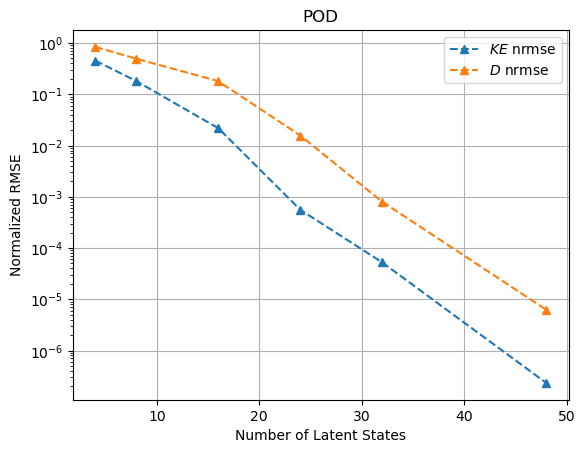

In [20]:
plt.semilogy(num_latent_states_list, pod_KE_nrmse_list, '--', marker='^', label=r'$KE$ nrmse')
plt.semilogy(num_latent_states_list, pod_D_nrmse_list, '--', marker='^', label=r'$D$ nrmse')
plt.grid(True)#, which='both')
plt.legend()
plt.xlabel('Number of Latent States')
plt.ylabel('Normalized RMSE')
plt.title('POD')
plt.show()

# Comparison of Time Averaged RMSE

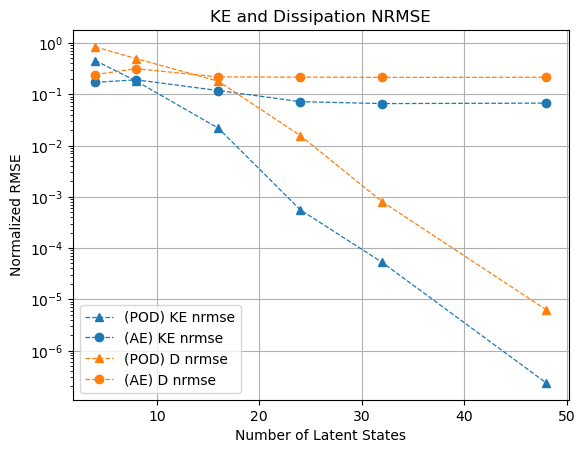

In [21]:
plt.semilogy(num_latent_states_list, pod_KE_nrmse_list, '--', marker='^', color='C0', linewidth=0.9)
plt.semilogy(num_latent_states_list, KE_nrmse_list, '--', marker='o', color='C0', linewidth=0.9)
plt.semilogy(num_latent_states_list, pod_D_nrmse_list, '--', marker='^', color='C1', linewidth=0.9)
plt.semilogy(num_latent_states_list, D_nrmse_list, '--', marker='o', color='C1', linewidth=0.9)
plt.legend(['(POD) KE nrmse', '(AE) KE nrmse', '(POD) D nrmse', '(AE) D nrmse'])
plt.grid(True)
plt.xlabel('Number of Latent States')
plt.ylabel('Normalized RMSE')
plt.title('KE and Dissipation NRMSE', size=12)
# plt.savefig(dir_name_all_ae+dir_sep+'data_'+data_dir_idx+'-AE_vs_POD.png', dpi=300, bbox_inches='tight')
plt.show()